In [1]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

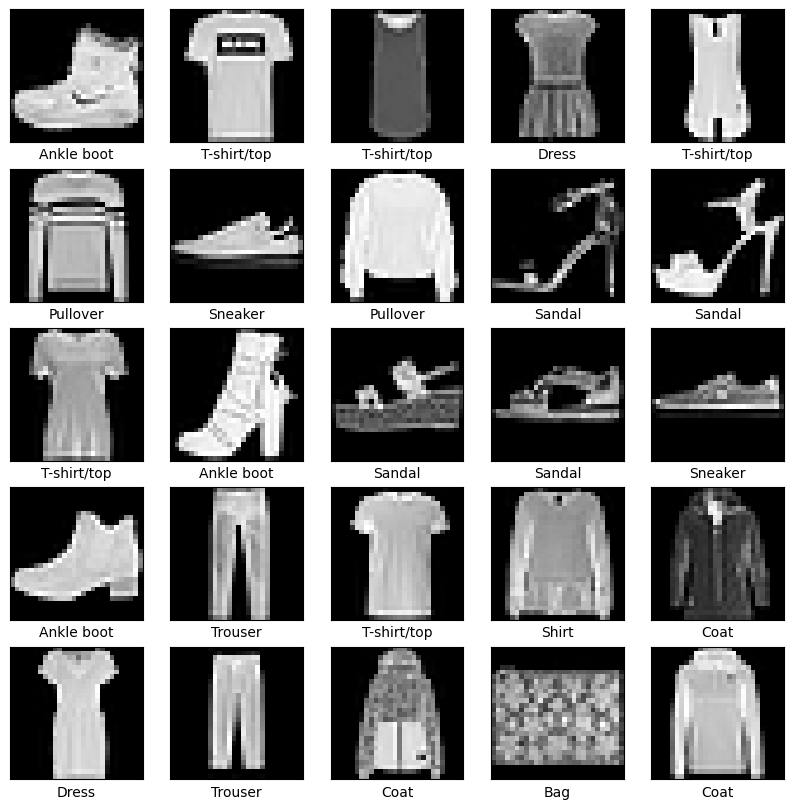

In [15]:
import matplotlib.pyplot as plt

# Define the text labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    # Use the label as the index for class_names
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
def preprocess(img):
    img = img / 255.0  # Normalize
    img_blur = cv2.GaussianBlur(img, (3,3), 0)  # Gaussian Blur
    img_eq = cv2.equalizeHist((img_blur*255).astype(np.uint8))  # Histogram Equalization
    sobelx = cv2.Sobel(img_eq, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_eq, cv2.CV_64F, 0, 1, ksize=3)
    edges = cv2.magnitude(sobelx, sobely)
    edges = edges / np.max(edges)  # Normalize again
    return edges

In [9]:
train_processed = np.array([preprocess(img) for img in train_images])
test_processed = np.array([preprocess(img) for img in test_images])


/tmp/ipython-input-4031083939.py:8: RuntimeWarning: invalid value encountered in divide
  edges = edges / np.max(edges)  # Normalize again


In [10]:
# 4. Flatten images for simple Dense model
# -----------------------------
train_flat = train_processed.reshape(len(train_processed), -1)
test_flat = test_processed.reshape(len(test_processed), -1)


In [11]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# -----------------------------
model.fit(train_flat, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0997 - loss: nan - val_accuracy: 0.1030 - val_loss: nan
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.1030 - val_loss: nan
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0997 - loss: nan - val_accuracy: 0.1030 - val_loss: nan
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.1030 - val_loss: nan
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1017 - loss: nan - val_accuracy: 0.1030 - val_loss: nan


In [14]:
test_loss, test_acc = model.evaluate(test_flat, test_labels)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1001 - loss: nan
Test Accuracy: 0.10000000149011612
